# <center> A Study of Factors related to Hypertension in Adults </center>


The objective of this notebook is to show some of the essential steps of a workflow for building predictive models. The notebook provides a few examples of each step and it is only a very thin slice of what a complete analysis would consist of.

The workflow includes:
1. **Problem Definition**:  A clear definition of the problem enables us to identify the appropriate data to gather and technique(s) to use in order to solve the problem. For many problems this may require background reading, discussion with domain experts, and layered problem specification.
2. **Data Gathering**: We have to know which data to use, where to gather them, and how to make them useful to solve our problem. In many cases, data from multiple sources can provide deeper insights.
3. **Exploratory Data Analysis**: Exploratory data analysis (EDA) is an approach of performing initial investigations on our data. EDA normally has descriptive nature and uses graphical statistics to discover patterns, to identify anomalies, to test hypothesis, and to check assumptions regarding our data.
4. **Data Cleaning and Wrangling**: Raw data are generally incomplete, inconsistent, and contain many errors. Thus, we need to prepare the data for further processing. Data wrangling is the process of cleaning, structuring, and enriching raw data into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes, such as analytics.
5. **Data Modelling**:  Data modelling involves selecting and optimizing the machine learning models that generate the best predictive performance based on the data we have.
6. **Prediction**: Once we have developed the best predictive model, we can deploy it to make predictions.



# 1.0. Problem Definition

Hypertension is a major public health problem and important area of research due to its high prevalence and being major risk factor for cardiovascular diseases and other complications. To assess the prevalence of hypertension and its associated factors this notebook analyzes the data from the NHANES datasets (https://www.cdc.gov/nchs/nhanes/index.htm)

We apply the tools of machine learning to predict the factors that are associated with systolic blood pressure in adults.



# 2.0. Data Gathering and Import


In [ ]:
#Before moving to the next section, we need to import all packages required to do the analysis by calling the following:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import the seaborn library

## 2.1. Gathering and Importing Data

We import the datasets by calling the following:

In [ ]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/"
LOCAL_DATA_PATH = os.path.join("datasets", "nhanes") + "/"
FILE_NAME = "P_DEMO.XPT"

def fetch_nhanes_data(file_name=FILE_NAME, nhanes_url=DOWNLOAD_ROOT,  nhanes_path=LOCAL_DATA_PATH):
    os.makedirs(nhanes_path, exist_ok=True)
    xpt_path = os.path.join(nhanes_path, file_name)
    url = nhanes_url + file_name
    urllib.request.urlretrieve(url, xpt_path)

In [ ]:
# Retrieve 2015-2016 data
fetch_nhanes_data("DEMO_I.XPT","https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/",LOCAL_DATA_PATH)
fetch_nhanes_data("BMX_I.XPT","https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/",LOCAL_DATA_PATH)
# Added section for physical activity (categorical)
fetch_nhanes_data("PAQ_I.XPT","https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/",LOCAL_DATA_PATH)

In [ ]:
# Retrieve 2017-2020 data
fetch_nhanes_data("P_DEMO.XPT","https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/",LOCAL_DATA_PATH)
fetch_nhanes_data("P_BPXO.XPT","https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/",LOCAL_DATA_PATH)
fetch_nhanes_data("P_BMX.XPT","https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/",LOCAL_DATA_PATH)

In [ ]:
# Added section for physical activity (categorical)
fetch_nhanes_data("P_PAQ.XPT","https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/",LOCAL_DATA_PATH)
# Added section for liver tests (numerical)
fetch_nhanes_data("P_LUX.XPT", "https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/",LOCAL_DATA_PATH)

In [ ]:
!ls $LOCAL_DATA_PATH

BMX_I.XPT   LUX_I.XPT  P_BMX.XPT   P_DEMO.XPT  P_PAQ.XPT
DEMO_I.XPT  PAQ_I.XPT  P_BPXO.XPT  P_LUX.XPT


In [ ]:
demo_df = pd.read_sas(LOCAL_DATA_PATH + "P_DEMO.XPT")
demo_df_16 = pd.read_sas(LOCAL_DATA_PATH + "DEMO_I.XPT")

bmx_df = pd.read_sas(LOCAL_DATA_PATH + "P_BMX.XPT")
bmx_df_16 = pd.read_sas(LOCAL_DATA_PATH + "BMX_I.XPT")

bpxo_df = pd.read_sas(LOCAL_DATA_PATH + "P_BPXO.XPT")

paq_df = pd.read_sas(LOCAL_DATA_PATH + "P_PAQ.XPT")
paq_df_16 = pd.read_sas(LOCAL_DATA_PATH + "PAQ_I.XPT")

lux_df = pd.read_sas(LOCAL_DATA_PATH + "P_LUX.XPT")

## 2.2. Exploring Data Structure and Features
Before performing data analysis, we often need to know the structure of our data. Therefore, we perform the following:
- Viewing a small part of our datasets
- Viewing data shape
- Describing the features contained in the datasets

In [ ]:
bmx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14300 entries, 0 to 14299
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      14300 non-null  float64
 1   BMDSTATS  14300 non-null  float64
 2   BMXWT     14075 non-null  float64
 3   BMIWT     588 non-null    float64
 4   BMXRECUM  1470 non-null   float64
 5   BMIRECUM  43 non-null     float64
 6   BMXHEAD   310 non-null    float64
 7   BMIHEAD   0 non-null      float64
 8   BMXHT     13157 non-null  float64
 9   BMIHT     171 non-null    float64
 10  BMXBMI    13137 non-null  float64
 11  BMDBMIC   4749 non-null   float64
 12  BMXLEG    10984 non-null  float64
 13  BMILEG    488 non-null    float64
 14  BMXARML   13490 non-null  float64
 15  BMIARML   487 non-null    float64
 16  BMXARMC   13484 non-null  float64
 17  BMIARMC   493 non-null    float64
 18  BMXWAIST  12574 non-null  float64
 19  BMIWAIST  617 non-null    float64
 20  BMXHIP    9862 non-null   fl

In [ ]:
demo_df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,...,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA,INDFMPIR
0,109263.0,66.0,2.0,1.0,2.0,NaN,5.0,6.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,7891.762435,8.951816e+03,3.0,156.0,4.66
1,109264.0,66.0,2.0,2.0,13.0,NaN,1.0,1.0,2.0,1.0,...,2.0,1.0,2.0,2.0,1.0,11689.747264,1.227116e+04,1.0,155.0,0.83
2,109265.0,66.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,16273.825939,1.665876e+04,1.0,157.0,3.06
3,109266.0,66.0,2.0,2.0,29.0,NaN,5.0,6.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,7825.646112,8.154968e+03,2.0,168.0,5.00
4,109267.0,66.0,1.0,2.0,21.0,NaN,2.0,2.0,NaN,2.0,...,2.0,NaN,NaN,NaN,NaN,26379.991724,5.397605e-79,1.0,156.0,5.00


In [ ]:
bpxo_df.describe()

,SEQN,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3
count,11656.000000,10373.000000,10352.000000,10352.000000,10327.000000,10327.000000,10286.000000,10286.000000,9471.000000,9448.000000,9412.000000
mean,117095.717742,3.501301,120.004637,72.035742,119.732255,71.503825,119.681898,71.258798,71.183824,71.946655,72.550892
std,4503.078500,0.695229,19.950131,12.416883,19.788502,12.436839,19.641619,12.405156,12.285039,12.360577,12.530454
min,109264.000000,2.000000,52.000000,31.000000,54.000000,28.000000,55.000000,30.000000,34.000000,34.000000,35.000000
25%,113185.750000,3.000000,106.000000,63.000000,106.000000,63.000000,106.000000,63.000000,62.000000,63.000000,63.750000
50%,117125.500000,3.000000,117.000000,71.000000,116.000000,71.000000,117.000000,70.000000,70.000000,71.000000,72.000000
75%,121019.250000,4.000000,130.000000,80.000000,130.000000,79.000000,130.000000,79.000000,79.000000,80.000000,80.000000
max,124822.000000,5.000000,225.000000,151.000000,222.000000,146.000000,220.000000,145.000000,142.000000,141.000000,147.000000


###  More data exploring  (todo)

In [ ]:
paq_df.head()

,SEQN,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,PAQ635,PAQ640,PAD645,PAQ650,PAQ655,PAD660,PAQ665,PAQ670,PAD675,PAD680
0,109266.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,5.0,60.0,1.0,4.0,30.0,480.0
1,109267.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,6.0,90.0,2.0,NaN,NaN,540.0
2,109268.0,1.0,5.0,540.0,1.0,5.0,300.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,540.0
3,109271.0,2.0,NaN,NaN,1.0,2.0,120.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,60.0
4,109273.0,1.0,3.0,240.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,4.0,120.0,180.0


In [ ]:
paq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9693 entries, 0 to 9692
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    9693 non-null   float64
 1   PAQ605  9693 non-null   float64
 2   PAQ610  2418 non-null   float64
 3   PAD615  2402 non-null   float64
 4   PAQ620  9693 non-null   float64
 5   PAQ625  4187 non-null   float64
 6   PAD630  4164 non-null   float64
 7   PAQ635  9693 non-null   float64
 8   PAQ640  2253 non-null   float64
 9   PAD645  2241 non-null   float64
 10  PAQ650  9693 non-null   float64
 11  PAQ655  2422 non-null   float64
 12  PAD660  2417 non-null   float64
 13  PAQ665  9693 non-null   float64
 14  PAQ670  3904 non-null   float64
 15  PAD675  3893 non-null   float64
 16  PAD680  9676 non-null   float64
dtypes: float64(17)
memory usage: 1.3 MB


In [ ]:
paq_df.describe()

,SEQN,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,PAQ635,PAQ640,PAD645,PAQ650,PAQ655,PAD660,PAQ665,PAQ670,PAD675,PAD680
count,9693.000000,9693.00000,2418.000000,2402.000000,9693.000000,4187.000000,4164.00000,9693.000000,2253.000000,2241.000000,9693.000000,2422.000000,2417.000000,9693.000000,3904.000000,3893.000000,9.676000e+03
mean,117075.170329,1.75539,4.259719,240.684430,1.573094,4.466205,218.59390,1.769009,4.833999,81.190986,1.750129,3.439719,84.638808,1.598679,3.574027,66.925507,3.992857e+02
std,4488.053213,0.47176,3.783601,587.289554,0.533974,4.941414,643.11463,0.434981,5.230560,474.934885,0.432961,2.495324,290.473799,0.501840,3.171040,170.102938,8.064577e+02
min,109266.000000,1.00000,1.000000,10.000000,1.000000,1.000000,10.00000,1.000000,1.000000,10.000000,1.000000,1.000000,10.000000,1.000000,1.000000,10.000000,5.397605e-79
25%,113201.000000,2.00000,3.000000,60.000000,1.000000,3.000000,60.00000,2.000000,3.000000,20.000000,2.000000,2.000000,40.000000,1.000000,2.000000,30.000000,1.800000e+02
50%,117037.000000,2.00000,5.000000,180.000000,2.000000,5.000000,120.00000,2.000000,5.000000,30.000000,2.000000,3.000000,60.000000,2.000000,3.000000,50.000000,3.000000e+02
75%,120969.000000,2.00000,5.000000,300.000000,2.000000,5.000000,240.00000,2.000000,7.000000,60.000000,2.000000,5.000000,120.000000,2.000000,5.000000,60.000000,4.800000e+02
max,124822.000000,9.00000,99.000000,9999.000000,9.000000,99.000000,9999.00000,9.000000,99.000000,9999.000000,2.000000,99.000000,9999.000000,9.000000,99.000000,9999.000000,9.999000e+03


In [ ]:
paq_df.isnull().sum()

SEQN         0
PAQ605       0
PAQ610    7275
PAD615    7291
PAQ620       0
PAQ625    5506
PAD630    5529
PAQ635       0
PAQ640    7440
PAD645    7452
PAQ650       0
PAQ655    7271
PAD660    7276
PAQ665       0
PAQ670    5789
PAD675    5800
PAD680      17
dtype: int64

In [ ]:
lux_df.head()

,SEQN,LUAXSTAT,LUARXNC,LUARXND,LUARXIN,LUAPNME,LUANMVGP,LUANMTGP,LUXSMED,LUXSIQR,LUXSIQRM,LUXCAPM,LUXCPIQR
0,109264.0,3.0,NaN,NaN,2.0,b'',NaN,5.397605e-79,NaN,NaN,NaN,NaN,NaN
1,109266.0,1.0,NaN,NaN,NaN,b'XL',10.0,2.000000e+01,6.4,1.0,15.6,277.0,45.0
2,109271.0,1.0,NaN,NaN,NaN,b'XL',10.0,1.000000e+01,5.5,0.6,10.9,303.0,30.0
3,109273.0,1.0,NaN,NaN,NaN,b'M',10.0,1.000000e+01,2.7,0.7,25.9,222.0,65.0
4,109274.0,1.0,NaN,NaN,NaN,b'M',12.0,1.200000e+01,4.4,0.6,13.6,279.0,28.0


In [ ]:
lux_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      10409 non-null  float64
 1   LUAXSTAT  10409 non-null  float64
 2   LUARXNC   748 non-null    float64
 3   LUARXND   252 non-null    float64
 4   LUARXIN   386 non-null    float64
 5   LUAPNME   10409 non-null  object 
 6   LUANMVGP  9702 non-null   float64
 7   LUANMTGP  10409 non-null  float64
 8   LUXSMED   9700 non-null   float64
 9   LUXSIQR   9706 non-null   float64
 10  LUXSIQRM  9691 non-null   float64
 11  LUXCAPM   9698 non-null   float64
 12  LUXCPIQR  9689 non-null   float64
dtypes: float64(12), object(1)
memory usage: 1.0+ MB


In [ ]:
lux_df.describe()

,SEQN,LUAXSTAT,LUARXNC,LUARXND,LUARXIN,LUANMVGP,LUANMTGP,LUXSMED,LUXSIQR,LUXSIQRM,LUXCAPM,LUXCPIQR
count,10409.000000,10409.000000,748.000000,252.000000,386.00000,9.702000e+03,1.040900e+04,9700.000000,9.706000e+03,9.691000e+03,9698.000000,9.689000e+03
mean,117094.509367,1.218657,1.768717,2.214286,1.61658,1.110823e+01,1.346662e+01,5.890598,9.804245e-01,1.508729e+01,257.588059,3.803385e+01
std,4500.406208,0.624747,0.841516,0.809379,0.48685,2.293853e+00,6.434055e+00,4.873673,2.197774e+00,1.855352e+01,63.549973,2.047476e+01
min,109264.000000,1.000000,1.000000,1.000000,1.00000,5.397605e-79,5.397605e-79,1.600000,5.397605e-79,5.397605e-79,100.000000,5.397605e-79
25%,113190.000000,1.000000,1.000000,2.000000,1.00000,1.000000e+01,1.000000e+01,4.100000,4.000000e-01,9.100000e+00,211.000000,2.400000e+01
50%,117114.000000,1.000000,2.000000,2.000000,2.00000,1.000000e+01,1.200000e+01,5.000000,7.000000e-01,1.310000e+01,253.000000,3.400000e+01
75%,120999.000000,1.000000,3.000000,3.000000,2.00000,1.200000e+01,1.600000e+01,6.100000,1.000000e+00,1.840000e+01,302.000000,4.800000e+01
max,124822.000000,4.000000,3.000000,3.000000,2.00000,3.000000e+01,3.000000e+01,75.000000,6.730000e+01,1.338000e+03,400.000000,2.060000e+02


In [ ]:
lux_df.isnull().sum()

SEQN            0
LUAXSTAT        0
LUARXNC      9661
LUARXND     10157
LUARXIN     10023
LUAPNME         0
LUANMVGP      707
LUANMTGP        0
LUXSMED       709
LUXSIQR       703
LUXSIQRM      718
LUXCAPM       711
LUXCPIQR      720
dtype: int64

### Keep only the columns that will be used in the analysis

Exercise 3B, 3C, 3D

In [ ]:
# Added this one (numerical)
keep_columns = ['SEQN','LUXSMED','LUXSIQR','LUXSIQRM', 'LUXCAPM', 'LUXCPIQR']
lux_sub_df = lux_df[keep_columns]
lux_sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10409 entries, 0 to 10408
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      10409 non-null  float64
 1   LUXSMED   9700 non-null   float64
 2   LUXSIQR   9706 non-null   float64
 3   LUXSIQRM  9691 non-null   float64
 4   LUXCAPM   9698 non-null   float64
 5   LUXCPIQR  9689 non-null   float64
dtypes: float64(6)
memory usage: 488.0 KB


In [ ]:
# Added this one (categorical)
keep_columns = ['SEQN','PAQ605','PAQ620','PAQ635', 'PAQ650', 'PAQ665']
# paq_sub_df = paq_df[keep_columns]
# Use concat to combine 2015/2016 data with 2017/2020 data
paq_sub_df = pd.concat([paq_df[keep_columns], paq_df_16[keep_columns]])
paq_sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18948 entries, 0 to 9254
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    18948 non-null  float64
 1   PAQ605  16659 non-null  float64
 2   PAQ620  16658 non-null  float64
 3   PAQ635  16658 non-null  float64
 4   PAQ650  16656 non-null  float64
 5   PAQ665  16656 non-null  float64
dtypes: float64(6)
memory usage: 1.0 MB


In [ ]:
keep_columns = ['SEQN','RIAGENDR','RIDAGEYR','DMDEDUC2']
# demo_sub_df = demo_df[keep_columns]
# Use concat to combine 2015/2016 data with 2017/2020 data
demo_sub_df = pd.concat([demo_df[keep_columns], demo_df_16[keep_columns]])
demo_sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25531 entries, 0 to 9970
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      25531 non-null  float64
 1   RIAGENDR  25531 non-null  float64
 2   RIDAGEYR  25531 non-null  float64
 3   DMDEDUC2  14951 non-null  float64
dtypes: float64(4)
memory usage: 997.3 KB


In [ ]:
keep_columns = [col for col in bpxo_df if col.startswith('BPXOS') | col.startswith('SEQN')]
bpxo_sub_df = bpxo_df[keep_columns]
bpxo_sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11656 entries, 0 to 11655
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     11656 non-null  float64
 1   BPXOSY1  10352 non-null  float64
 2   BPXOSY2  10327 non-null  float64
 3   BPXOSY3  10286 non-null  float64
dtypes: float64(4)
memory usage: 364.4 KB


In [ ]:
keep_columns= ['SEQN','BMXWT','BMXHT','BMXBMI']
# bmx_sub_df = bmx_df[keep_columns]
# Use concat to combine 2015/2016 data with 2017/2020 data
bmx_sub_df = pd.concat([bmx_df[keep_columns], bmx_df_16[keep_columns]])
bmx_sub_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23844 entries, 0 to 9543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    23844 non-null  float64
 1   BMXWT   23520 non-null  float64
 2   BMXHT   21926 non-null  float64
 3   BMXBMI  21893 non-null  float64
dtypes: float64(4)
memory usage: 931.4 KB


### Merge the datatables into a single table

In [ ]:
hp_df = demo_sub_df.merge(bpxo_sub_df, how='inner', on='SEQN')
hp_df = hp_df.merge(bmx_sub_df,how="inner", on='SEQN')
# Added these ones
hp_df = hp_df.merge(paq_sub_df, how="inner", on='SEQN')
hp_df = hp_df.merge(lux_sub_df, how="inner", on='SEQN')
hp_df.shape

(8965, 20)

In [ ]:
# Note the missing values
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8965 entries, 0 to 8964
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      8965 non-null   float64
 1   RIAGENDR  8965 non-null   float64
 2   RIDAGEYR  8965 non-null   float64
 3   DMDEDUC2  8544 non-null   float64
 4   BPXOSY1   8024 non-null   float64
 5   BPXOSY2   8013 non-null   float64
 6   BPXOSY3   7993 non-null   float64
 7   BMXWT     8811 non-null   float64
 8   BMXHT     8804 non-null   float64
 9   BMXBMI    8790 non-null   float64
 10  PAQ605    8965 non-null   float64
 11  PAQ620    8965 non-null   float64
 12  PAQ635    8965 non-null   float64
 13  PAQ650    8965 non-null   float64
 14  PAQ665    8965 non-null   float64
 15  LUXSMED   8318 non-null   float64
 16  LUXSIQR   8325 non-null   float64
 17  LUXSIQRM  8311 non-null   float64
 18  LUXCAPM   8317 non-null   float64
 19  LUXCPIQR  8310 non-null   float64
dtypes: float64(20)
memory usage: 1

# 3.0 Exploratory Data Analysis

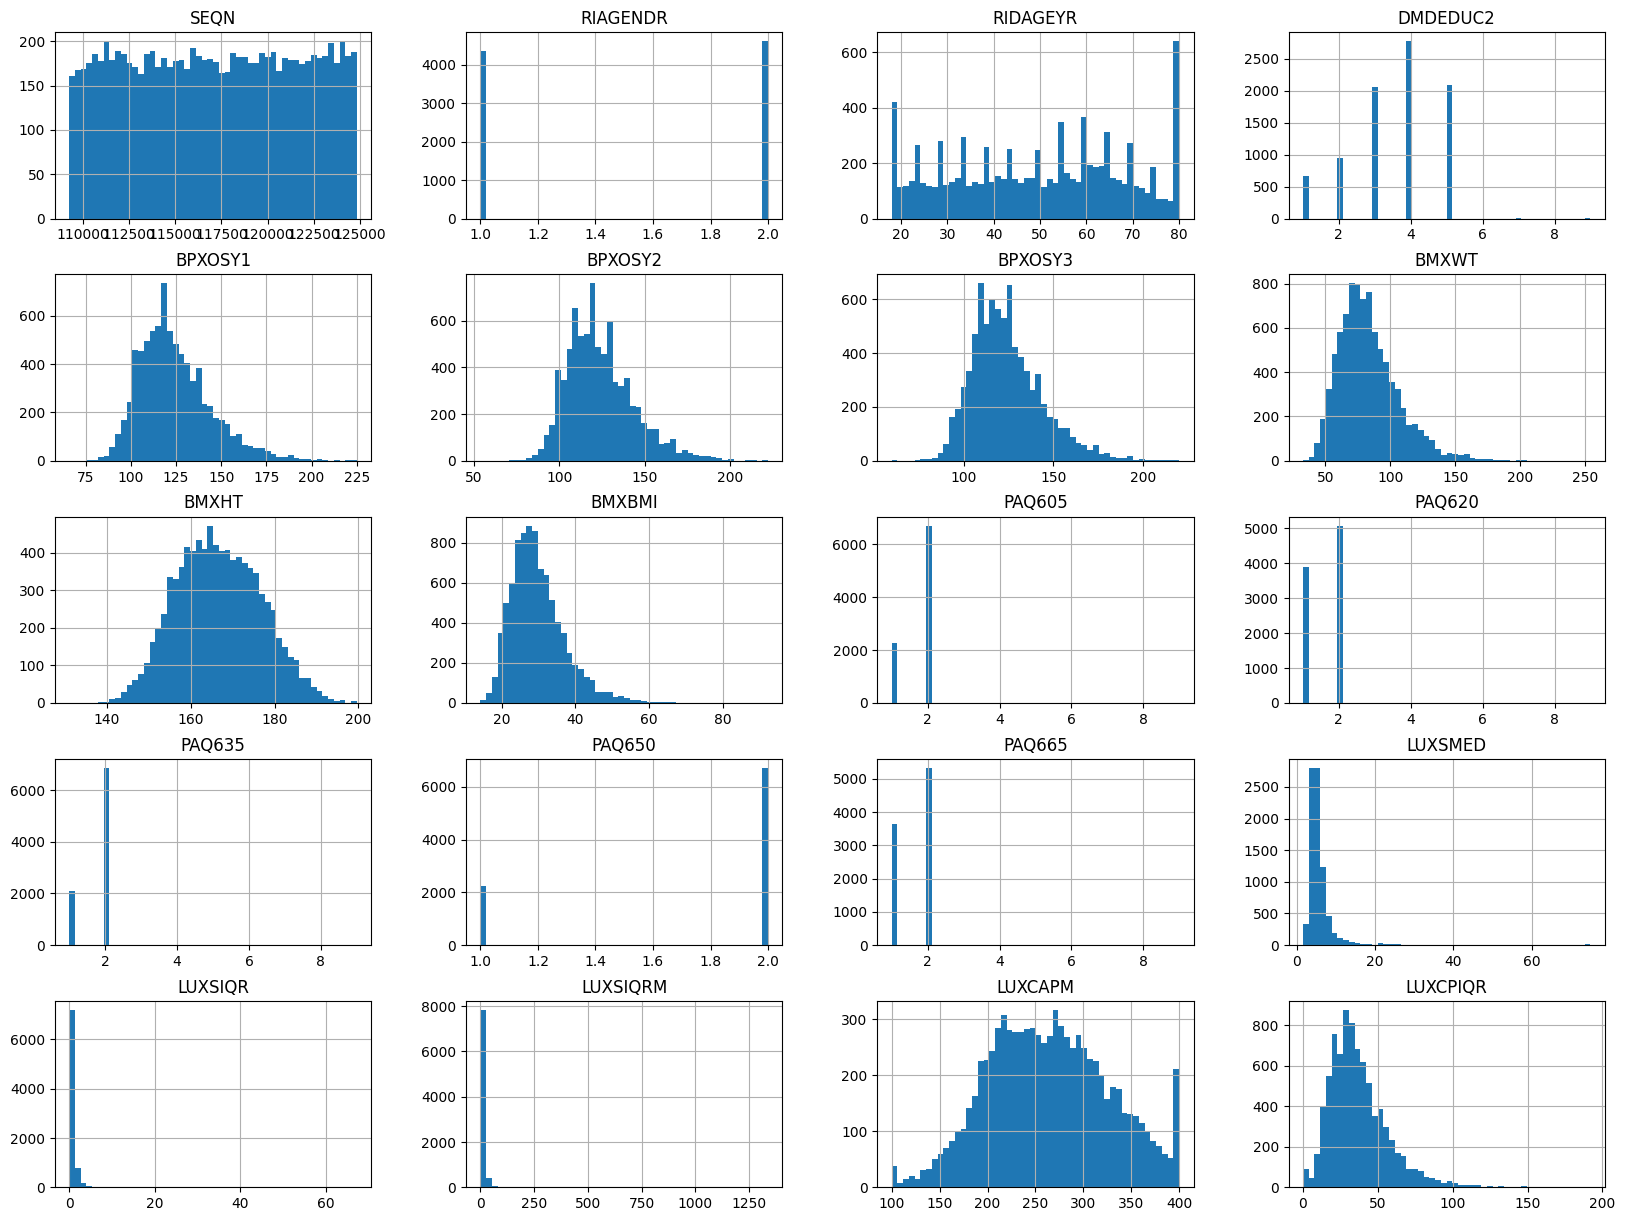

In [ ]:
hp_df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# hp_sub_df = hp_df[['BMXBMI','BPXOSY', 'RIAGENDR','BMXWT','BMXHT','RIDAGEYR']]
corr_matrix = hp_df.corr()
corr_matrix["BPXOSY1"].sort_values(ascending=False)

BPXOSY1     1.000000
BPXOSY2     0.951300
BPXOSY3     0.938796
RIDAGEYR    0.455022
PAQ650      0.154641
LUXCAPM     0.139737
PAQ665      0.072064
LUXSMED     0.062236
PAQ620      0.055599
BMXWT       0.034486
BMXBMI      0.032607
LUXSIQR     0.026982
LUXSIQRM    0.021804
PAQ635      0.019253
PAQ605      0.015591
BMXHT       0.011691
SEQN       -0.017736
LUXCPIQR   -0.042787
DMDEDUC2   -0.129074
RIAGENDR   -0.130165
Name: BPXOSY1, dtype: float64

In [ ]:
hp_df.isnull().sum()

SEQN          0
RIAGENDR      0
RIDAGEYR      0
DMDEDUC2    421
BPXOSY1     941
BPXOSY2     952
BPXOSY3     972
BMXWT       154
BMXHT       161
BMXBMI      175
PAQ605        0
PAQ620        0
PAQ635        0
PAQ650        0
PAQ665        0
LUXSMED     647
LUXSIQR     640
LUXSIQRM    654
LUXCAPM     648
LUXCPIQR    655
dtype: int64

In [ ]:
feat_desc = pd.DataFrame({'Description': ['Respondent Sequence Number',
                                          'The gender of the passenger',
                                          'Age in years at screening',
                                          'The Education Level Adults 20+',
                                          'Systolic 1st Oscillometric reading',
                                          'Systolic 2nd Oscillometric reading',
                                          'Systolic 3rd Oscillometric reading',
                                          'Weight (Kg)',
                                          'Standing Height (cm)',
                                          'Body Mass Index (Kg/m**2)',
                                          'Vigorous work activity',
                                          'Moderate work activity',
                                          'Weekly walk / bicycle activity',
                                          'Vigorous recreational activities',
                                          'Moderate recreational activities',
                                          'Median liver stiffness',
                                          'Stiffness E interquartile range',
                                          'Ratio: Stiffness IQRe / median E',
                                          'Median controlled attenuated parameter (CAP)',
                                          'Controlled attenuated parameter (CAP) interquartile range (IQRc)',],
                          'Values': [hp_df[i].unique() for i in hp_df.columns],
                          'Number of unique values': [len(hp_df[i].unique()) for i in hp_df.columns]},
                          index = hp_df.columns)

feat_desc

,Description,Values,Number of unique values
SEQN,Respondent Sequence Number,"[109266.0, 109271.0, 109273.0, 109274.0, 10928...",8965
RIAGENDR,The gender of the passenger,"[2.0, 1.0]",2
RIDAGEYR,Age in years at screening,"[29.0, 49.0, 36.0, 68.0, 76.0, 44.0, 33.0, 42....",63
DMDEDUC2,The Education Level Adults 20+,"[5.0, 2.0, 4.0, 3.0, 1.0, nan, 9.0, 7.0]",8
BPXOSY1,Systolic 1st Oscillometric reading,"[99.0, 102.0, 116.0, 138.0, 141.0, nan, 126.0,...",139
BPXOSY2,Systolic 2nd Oscillometric reading,"[99.0, 108.0, 110.0, 132.0, 137.0, nan, 116.0,...",139
BPXOSY3,Systolic 3rd Oscillometric reading,"[99.0, 111.0, 115.0, 132.0, 140.0, nan, 122.0,...",137
BMXWT,Weight (Kg),"[97.1, 98.8, 74.3, 103.7, 83.3, 91.1, 72.6, 73...",1136
BMXHT,Standing Height (cm),"[160.2, 182.3, 184.2, 185.3, 177.1, 152.7, 158...",532
BMXBMI,Body Mass Index (Kg/m**2),"[37.8, 29.7, 21.9, 30.2, 26.6, 39.1, 28.9, 28....",453


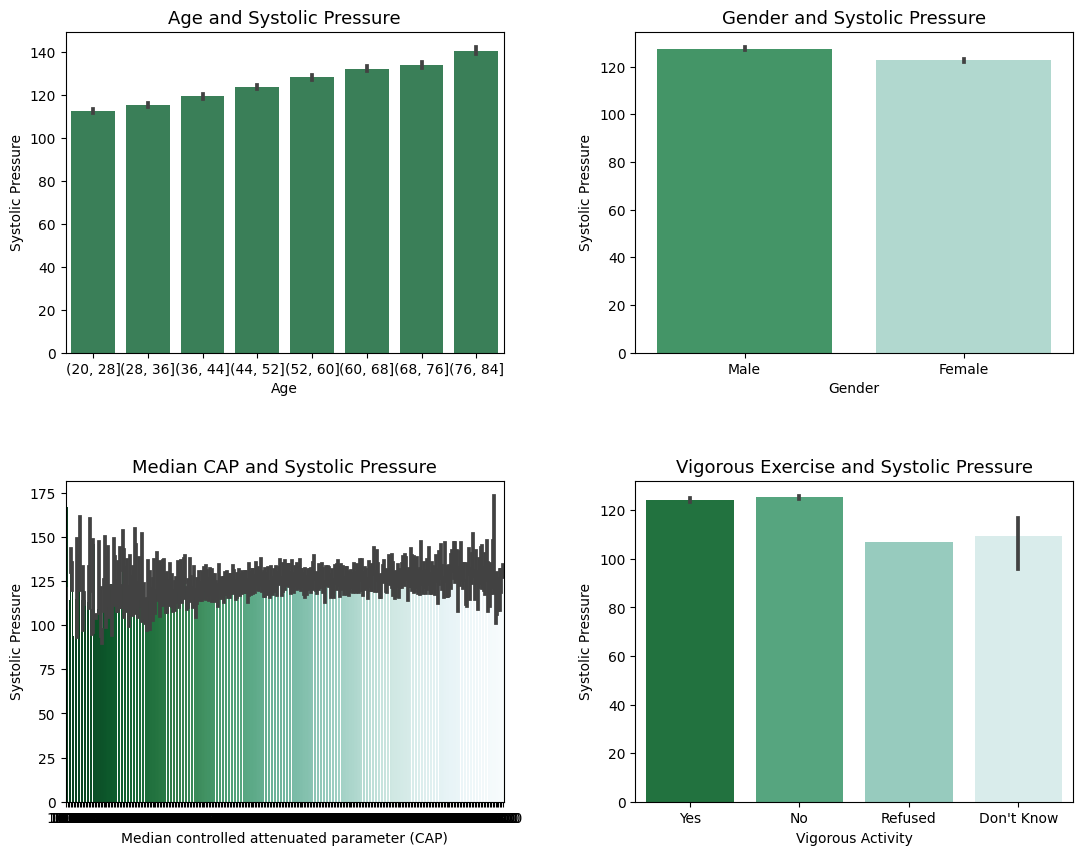

In [ ]:
plt.figure(figsize=(13,10))

hp_df['age_groups'] = pd.cut(hp_df['RIDAGEYR'], bins=range(20,90,8))

# Creating a bar chart of ticket class (Pclass) vs probability of survival (Survived)
ax1 = plt.subplot(221)
g1 = sns.barplot(x='age_groups', y='BPXOSY1', data=hp_df, color='seagreen')
plt.ylabel('Systolic Pressure')
plt.xlabel('Age')
plt.title('Age and Systolic Pressure', size=13)

hp_df = hp_df.drop('age_groups', axis=1)
# Creating a bar chart of ticket class (Pclass) and gender (Sex) vs probability of survival (Survived)
ax2 = plt.subplot(222)
g2 = sns.barplot(x='RIAGENDR', y='BPXOSY1', data=hp_df, palette='BuGn_r')
plt.ylabel('Systolic Pressure')
plt.xlabel('Gender')
ax2.set_xticklabels(['Male', 'Female'])
plt.title('Gender and Systolic Pressure', size=13)

# Creating a bar chart of ticket class (Pclass) and gender (Sex) vs probability of survival (Survived)
ax3 = plt.subplot(223)
g3 = sns.barplot(x='LUXCAPM', y='BPXOSY1', data=hp_df, palette='BuGn_r')
plt.ylabel('Systolic Pressure')
plt.xlabel('Median controlled attenuated parameter (CAP)')
# ax3.set_xticklabels(['100', '200', '300', '400'])
plt.title('Median CAP and Systolic Pressure', size=13)

# # Creating a bar chart of ticket class (Pclass) and gender (Sex) vs probability of survival (Survived)
ax4 = plt.subplot(224)
g4 = sns.barplot(x='PAQ605', y='BPXOSY1', data=hp_df, palette='BuGn_r')
plt.ylabel('Systolic Pressure')
plt.xlabel('Vigorous Activity')
ax4.set_xticklabels(['Yes', 'No', 'Refused', 'Don\'t Know'])
plt.title('Vigorous Exercise and Systolic Pressure', size=13)


plt.subplots_adjust(hspace = 0.4, wspace = 0.3)

plt.show()

The top-left barchart shows age and systolic blood pressure are correlations

The top-right barchart shows differences between male and female blood pressures.

The bottom-left chart represents the median controlled attenuated parameter (CAP) and the systolic blood pressure differences

The bottom-right chart represents the correlation between the level of regular high-level physical activity and systolic blood pressure

### More graph and EDA needed (todo)

# 4.0 Data Cleaning and Wrangling

### We do some of the cleaning and attribute adding now before the split

In [ ]:
def bp_add_attributes(hp_df):
    if 'BPXOSY' not in hp_df.columns:
         hp_df['BPXOSY']= (hp_df['BPXOSY1'] + hp_df['BPXOSY2'] + hp_df['BPXOSY3'])/3
        #  hp_df['BPXOSY'].fillna(hp_df['BPXOSY'].mean(), inplace=True)

    return hp_df

In [ ]:
def bp_trim_rows(hp_df):
    # Fill all rows with missing values with the average calculated in previous step
    if ('BPXOSY1' in hp_df.columns) & ('BPXOSY2' in hp_df.columns) & ('BPXOSY3' in hp_df.columns):
        hp_df = hp_df[hp_df['BPXOSY1'].notna() & hp_df['BPXOSY2'].notna() & hp_df['BPXOSY3'].notna()]
        # This gives error with NaN values when training model
        # hp_df['BPXOSY1'].fillna(hp_df['BPXOSY'], inplace=True)
        # hp_df['BPXOSY2'].fillna(hp_df['BPXOSY'], inplace=True)
        # hp_df['BPXOSY3'].fillna(hp_df['BPXOSY'], inplace=True)

    # We are only interested in adults, so let's drop all individuals with an age less than 20
    hp_df = hp_df[hp_df['RIDAGEYR'] >= 20]
    return hp_df

In [ ]:
def bp_drop_columns(hp_df):
    # We do not need the seqn now (only needed for the merge)
    if 'SEQN' in hp_df.columns:
        hp_df = hp_df.drop("SEQN",axis=1)
    # the systolic numbers have been averaged
    if 'BPXOSY1' in hp_df.columns:
        hp_df = hp_df.drop('BPXOSY1',axis=1)
    if 'BPXOSY2' in hp_df.columns:
        hp_df = hp_df.drop('BPXOSY2',axis=1)
    if 'BPXOSY3' in hp_df.columns:
        hp_df = hp_df.drop("BPXOSY3",axis=1)

    return hp_df


In [ ]:
def bp_add_trim_drop(hp_df):
    hp_df = bp_trim_rows(hp_df)
    hp_df = bp_add_attributes(hp_df)
    hp_df = bp_drop_columns(hp_df)

    return hp_df

In [ ]:
hp_df = bp_add_trim_drop(hp_df)
hp_df.head()
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7619 entries, 0 to 8964
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  7619 non-null   float64
 1   RIDAGEYR  7619 non-null   float64
 2   DMDEDUC2  7619 non-null   float64
 3   BMXWT     7565 non-null   float64
 4   BMXHT     7557 non-null   float64
 5   BMXBMI    7549 non-null   float64
 6   PAQ605    7619 non-null   float64
 7   PAQ620    7619 non-null   float64
 8   PAQ635    7619 non-null   float64
 9   PAQ650    7619 non-null   float64
 10  PAQ665    7619 non-null   float64
 11  LUXSMED   7184 non-null   float64
 12  LUXSIQR   7189 non-null   float64
 13  LUXSIQRM  7178 non-null   float64
 14  LUXCAPM   7183 non-null   float64
 15  LUXCPIQR  7177 non-null   float64
 16  BPXOSY    7619 non-null   float64
dtypes: float64(17)
memory usage: 1.0 MB


### Now split into training and test data sets

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(hp_df, test_size=0.2, random_state=42)

In [ ]:
# have some background information that leads us to believe male and female heart rates are different
#  so we make sure that we have even split across train and test
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(hp_df, hp_df['RIAGENDR']):
        strat_train_set = hp_df.iloc[train_index]
        strat_test_set = hp_df.iloc[test_index]

In [ ]:
bp_train_X = strat_train_set.drop("BPXOSY", axis=1)
bp_train_y = strat_train_set["BPXOSY"].copy()

In [ ]:
bp_train_X.head()

,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,LUXSMED,LUXSIQR,LUXSIQRM,LUXCAPM,LUXCPIQR
21,2.0,62.0,3.0,77.2,159.2,30.5,2.0,1.0,2.0,2.0,2.0,4.3,0.7,16.3,228.0,29.0
6346,1.0,60.0,1.0,106.5,173.3,35.5,1.0,1.0,1.0,2.0,1.0,3.8,0.5,13.2,311.0,56.0
1567,2.0,33.0,4.0,57.5,151.7,25.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN
2121,2.0,36.0,5.0,53.7,161.6,20.6,1.0,1.0,2.0,2.0,2.0,2.8,0.5,17.9,148.0,42.0
5269,1.0,57.0,1.0,115.4,176.4,37.1,2.0,2.0,2.0,2.0,2.0,5.1,0.9,17.6,400.0,27.0


### set missing values of numerical data to the median

In [ ]:
# Gender is a categorical field, so we need to remove to do column calculations

bp_num = bp_train_X.drop("RIAGENDR",axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ])
#bp_num_tr = num_pipeline.fit_transform(bp_num)

In [ ]:
num_attribs = list(bp_num)
cat_attribs = ["RIAGENDR"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ])
bp_prepared = full_pipeline.fit_transform(bp_train_X)

In [ ]:
# bp_prepared is in a numpy array. Sometimes it is useful to have the data in a dataframe, so let's build one
# we do not use this dataframe for the rest of the notebook, but you may find it useful
column_names = num_attribs.copy()
column_names.append('Male')
column_names.append('Female')
bp_prepared_df = pd.DataFrame(bp_prepared, columns=column_names)
bp_prepared_df.head()

,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI,PAQ605,PAQ620,PAQ635,PAQ650,PAQ665,LUXSMED,LUXSIQR,LUXSIQRM,LUXCAPM,LUXCPIQR,Male,Female
0,0.635370,-0.497367,-0.290045,-0.770440,0.069590,0.539340,-1.036334,0.514677,0.567561,0.799255,-0.329989,-0.134432,0.044356,-0.621770,-0.396489,0.0,1.0
1,0.519608,-2.195660,0.990047,0.634334,0.744757,-1.582852,-1.036334,-1.758479,0.567561,-1.162669,-0.424393,-0.215353,-0.099957,0.740134,0.999375,1.0,0.0
2,-1.043177,0.351779,-1.150721,-1.517661,-0.673093,0.539340,0.813287,0.514677,0.567561,0.799255,-0.178942,-0.134432,-0.095302,-0.014656,-0.189695,0.0,1.0
3,-0.869534,1.200925,-1.316740,-0.531330,-1.267240,-1.582852,-1.036334,0.514677,0.567561,0.799255,-0.613201,-0.215353,0.118840,-1.934448,0.275593,0.0,1.0
4,0.345966,-2.195660,1.378880,0.943186,0.960811,0.539340,0.813287,0.514677,0.567561,0.799255,-0.178942,-0.053511,0.104874,2.200489,-0.499887,1.0,0.0


# 5.0 Data Modeling

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(bp_prepared, bp_train_y)

LinearRegression()

In [ ]:
#some_data = X.iloc[:5]
some_data = bp_prepared[:5]
some_labels = bp_train_y.iloc[:5]
print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))


Predictions: [127.74202298 135.55562822 113.80386496 113.69918407 133.97054038]
Labels: [140.33333333333334, 157.33333333333334, 108.66666666666667, 94.0, 140.33333333333334]


In [ ]:
from sklearn.metrics import mean_squared_error
systolic_predictions = lin_reg.predict(bp_prepared)
lin_mse = mean_squared_error(bp_train_y, systolic_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

17.134606402684625

# Random Forest - 3E

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(bp_prepared, bp_train_y)

RandomForestRegressor()

In [ ]:
#some_data = X.iloc[:5]
some_data = bp_prepared[:5]
some_labels = bp_train_y.iloc[:5]
print("Predictions:", forest_reg.predict(some_data))
print("Labels:", list(some_labels))


Predictions: [136.2        148.43666667 106.31666667  97.99       134.3       ]
Labels: [140.33333333333334, 157.33333333333334, 108.66666666666667, 94.0, 140.33333333333334]


### Cross Validation (todo)

In [ ]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, bp_prepared, bp_train_y, scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-lin_scores)

forest_scores = cross_val_score(forest_reg, bp_prepared, bp_train_y, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(lin_reg_rmse_scores)
display_scores(forest_rmse_scores)

Scores: [17.2940043  15.99935717 16.63548938 17.24185224 17.66425616 16.63931556
 17.53321303 18.29718989 17.35182273 17.25257061]
Mean: 17.19090710820491
Standard deviation: 0.6033695609768264
Scores: [17.47417633 16.19187345 16.67312591 17.32196741 17.67344724 17.08403364
 17.29723183 18.24731642 17.51883179 17.83517245]
Mean: 17.331717647045302
Standard deviation: 0.5531268155015222


# 6.0 Prediction

### Evaluate on the test set : only done at the end of all modeling (once !)

In [ ]:
X_test = strat_test_set.drop("BPXOSY", axis=1)
y_test = strat_test_set["BPXOSY"].copy()

In [ ]:
bp_prepared = full_pipeline.fit_transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
systolic_predictions = lin_reg.predict(bp_prepared)
lin_mse = mean_squared_error(y_test, systolic_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

16.976098161329155

In [ ]:
final_predictions = forest_reg.predict(bp_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

17.1794715472749